# Movie Recommender System using Python 

## Project by Sai Anirudh Basamsetty

### A basic recommendation system using python that suggests movies that are most similar to a particular movie.

# Table of Contents
- [Importing Libraries](#Importing-Libraries)
- [Exploratory data analysis and Visualizations](#Exploratory-data-analysis-and-Visualizations)
- [Algorithm](#Algorithm-for-Recommendation-starts-here)
- [Get your Movie Suggestions Here!!!](#Get-a-list-of-movie-suggestions-below.)

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# Importing TSV file and Exploring Data

In [3]:
df = pd.read_csv('./u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])

In [4]:
df.drop(['timestamp'],axis=1,inplace=True)

### As we can observe, the above TSV file contains only information about UserId, ItemId, Rating given by the user and Timestamps(Which is not needed). An other CSV file has information about Movie Titles and Item Id. Since both dataframes have a common ItemId column we will merge both.

In [5]:
movie_titles = pd.read_csv("./movie_id_titles")

In [6]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df,movie_titles,on='item_id')

# Checking for Null values if any

In [8]:
df.shape

(100003, 4)

In [9]:
df.size

400012

In [10]:
NANS = [(i,df[i].isna().sum()) for i in df]

In [11]:
pd.DataFrame(NANS,columns=['Feature Name','Number of Null Values'])

,Feature Name,Number of Null Values
0,user_id,0
1,item_id,0
2,rating,0
3,title,0


# No null values

# Exploratory data analysis and Visualizations

# Let us now create a seperate Dataframe for Number of Ratings and Average Rating for each movie

In [12]:
avg_rating = df.groupby('title')['rating'].mean()

In [13]:
ratings = df.groupby('title')['rating'].count()

In [14]:
ratings_df = pd.DataFrame(avg_rating)

In [15]:
ratings_df['Number of ratings'] = ratings

In [16]:
ratings_df.head()

,rating,Number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


# Data Visualizations

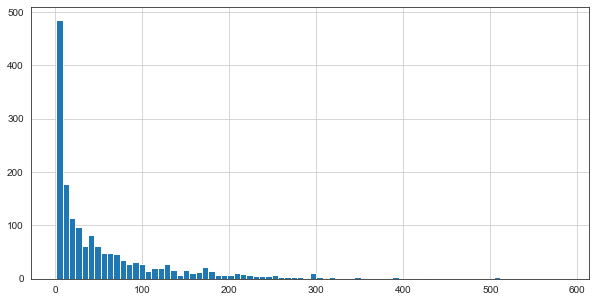

In [17]:
plt.figure(figsize=(10,5))
ratings_df['Number of ratings'].hist(bins=80)

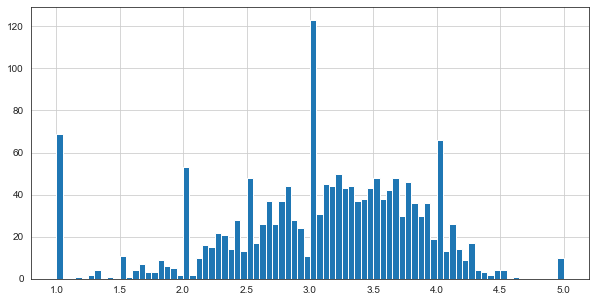

In [18]:
plt.figure(figsize=(10,5))
ratings_df['rating'].hist(bins=80)

#### Most number of movies have an average rating of 3 which makes sense and we also can observe some outliers after 4.5

<Figure size 720x360 with 0 Axes>

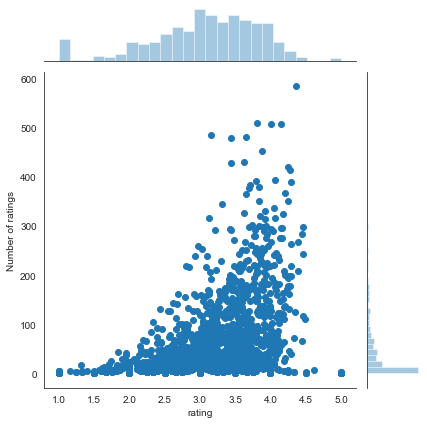

In [19]:
plt.figure(figsize=(10,5))
sns.jointplot(x='rating',y='Number of ratings',data=ratings_df)

In [20]:
df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


# Algorithm for Recommendation starts here

In [21]:
moviematrix = df.pivot_table(index='user_id',columns='title',values='rating') #creates a pivot matrix with userid on X and Movie title on Y

In [22]:
moviematrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
ratings_df.sort_values('Number of ratings',ascending=False)

,rating,Number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


# Let us create a function that can suggest movies based on your favourite movie

In [24]:
def get_recommened_movies(moviename):
    similarratings = moviematrix[str(moviename)]
    recommendations = pd.DataFrame(moviematrix.corrwith(similarratings),columns=['Correlation'])
    corr = recommendations.join(ratings_df['Number of ratings'])
    recom = corr[corr['Number of ratings']>100].sort_values('Correlation',ascending=False).head(10)
    return pd.DataFrame(recom.index)

# Get a list of movie suggestions below.

In [25]:
get_recommened_movies('Liar Liar (1997)')

/home/anirudh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/anirudh/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title
0,Liar Liar (1997)
1,Batman Forever (1995)
2,"Mask, The (1994)"
3,Down Periscope (1996)
4,Con Air (1997)
5,Pretty Woman (1990)
6,101 Dalmatians (1996)
7,Michael (1996)
8,Waterworld (1995)
9,Indiana Jones and the Last Crusade (1989)


In [27]:
df['title'].unique()[0:1000] #This is the list of available movies in our database

array(['Star Wars (1977)', 'Empire Strikes Back, The (1980)',
       'Gone with the Wind (1939)', 'Kolya (1996)',
       'L.A. Confidential (1997)', 'Heavyweights (1994)',
       'Legends of the Fall (1994)', 'Jackie Brown (1997)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
       'Hunt for Red October, The (1990)', 'Jungle Book, The (1994)',
       'Grease (1978)', 'Remains of the Day, The (1993)',
       'Men in Black (1997)',
       "Romy and Michele's High School Reunion (1997)",
       'Star Trek: First Contact (1996)',
       'To Wong Foo, Thanks for Everything! Julie Newmar (1995)',
       'Batman Forever (1995)', 'Only You (1994)',
       'Age of Innocence, The (1993)', 'Sabrina (1995)',
       'Just Cause (1995)', 'Endless Summer 2, The (1994)',
       'Man Without a Face, The (1993)', 'Sabrina (1954)',
       'Die Hard (1988)', 'Twister (1996)', 'Toy Story (1995)',
       'Broken Arrow (1996)', 'Aladdin (1992)', 'Casper (1995)',
    